# Task 3 - PyTorch

In [1]:
# Import libraries
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set random seeds for reproducibility
torch.manual_seed(46853)
np.random.seed(46853)

In [2]:
# Download and load the CIFAR-10 dataset
# dataset = torchvision.datasets.CIFAR10(root='data/', download=True, transform=transforms.ToTensor())

# Download and load the FASHION-MNIST dataset
# dataset = torchvision.datasets.FashionMNIST(root='data/', download=True, transform=transforms.ToTensor())

# Download and load the KMNIST dataset
dataset = torchvision.datasets.KMNIST(root='data/', download=True, transform=transforms.ToTensor())

# Split the dataset into a training set and a test set
num_train = int(0.8 * len(dataset))
num_test = len(dataset) - num_train
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [num_train, num_test])

# Create data loaders for the training and test sets
batch_size = 8
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100.0%


Extracting data/KMNIST\raw\train-images-idx3-ubyte.gz to data/KMNIST\raw



100.0%


Extracting data/KMNIST\raw\train-labels-idx1-ubyte.gz to data/KMNIST\raw



100.0%


Extracting data/KMNIST\raw\t10k-images-idx3-ubyte.gz to data/KMNIST\raw



100.0%

Extracting data/KMNIST\raw\t10k-labels-idx1-ubyte.gz to data/KMNIST\raw



In [3]:
# # Network for CIFAR-10
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.batch_norm1 = nn.BatchNorm2d(6)  # Batch normalization layer
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.batch_norm2 = nn.BatchNorm2d(16)  # Batch normalization layer
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.dropout = nn.Dropout(p=0.5)
#         self.fc2 = nn.Linear(120, 128)
#         self.batch_norm3 = nn.BatchNorm1d(128)  # Batch normalization layer
#         self.fc3 = nn.Linear(128, 84)
#         self.batch_norm4 = nn.BatchNorm1d(84)  # Batch normalization layer
#         self.fc4 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))  # Batch normalization on the output of the first convolutional layer
#         x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))  # Batch normalization on the output of the second convolutional layer
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = F.relu(self.batch_norm3(self.fc2(x)))  # Batch normalization on the output of the second fully connected layer
#         x = F.relu(self.batch_norm4(self.fc3(x)))  # Batch normalization on the output of the third fully connected layer
#         x = self.fc4(x)
#         return x

In [4]:
# # Network for FASHION-MNIST
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 6, 3, stride=1, padding=1)  # Change the input channels and kernel size
#         self.batch_norm1 = nn.BatchNorm2d(6)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 3, stride=1, padding=1)
#         self.batch_norm2 = nn.BatchNorm2d(16)
#         self.fc1 = nn.Linear(16 * 7 * 7, 120)  # Change the input size to match the new feature map size
#         self.dropout = nn.Dropout(p=0.5)
#         self.fc2 = nn.Linear(120, 128)
#         self.batch_norm3 = nn.BatchNorm1d(128)
#         self.fc3 = nn.Linear(128, 84)
#         self.batch_norm4 = nn.BatchNorm1d(84)
#         self.fc4 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
#         x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
#         x = x.view(-1, 16 * 7 * 7)  # Change the shape of the feature maps
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = F.relu(self.batch_norm3(self.fc2(x)))
#         x = F.relu(self.batch_norm4(self.fc3(x)))
#         x = self.fc4(x)
#         return x

In [5]:
# Network for KMNIST
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, stride=1, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, stride=1, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 7 * 7, 120)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, 128)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 84)
        self.batch_norm4 = nn.BatchNorm1d(84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = x.view(-1, 16 * 7 * 7)  # Change the shape of the feature maps
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.batch_norm3(self.fc2(x)))
        x = F.relu(self.batch_norm4(self.fc3(x)))
        x = self.fc4(x)
        return x

In [6]:
# Define the model
model = CNN()
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.0066)

# Define lists to store the training loss and accuracy
train_losses = []
mean_accuracies = []

In [7]:
# Train the CNN
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    running_accuracy = 0.0
    num_batches = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        # Calculate the accuracy for this mini-batch
        accuracy = (outputs.argmax(dim=1) == labels).float().mean().item()

        # Adds this to the running accuracy
        running_accuracy += accuracy
        num_batches += 1

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_losses.append(running_loss / 2000)
            print("Accuracy: " + str(accuracy))
            running_loss = 0.0

    # Calculate the mean accuracy for the epoch
    mean_accuracy = running_accuracy / num_batches
    mean_accuracies.append(mean_accuracy)

[1,   500] loss: 0.453
Accuracy: 0.125
[1,  1000] loss: 0.320
Accuracy: 0.625
[1,  1500] loss: 0.252
Accuracy: 0.75
[1,  2000] loss: 0.223
Accuracy: 0.875
[1,  2500] loss: 0.208
Accuracy: 0.75
[1,  3000] loss: 0.193
Accuracy: 0.875
[1,  3500] loss: 0.175
Accuracy: 0.875
[1,  4000] loss: 0.163
Accuracy: 0.875
[1,  4500] loss: 0.166
Accuracy: 0.75
[1,  5000] loss: 0.149
Accuracy: 0.875
[1,  5500] loss: 0.135
Accuracy: 0.875
[1,  6000] loss: 0.145
Accuracy: 0.75
[2,   500] loss: 0.129
Accuracy: 0.625
[2,  1000] loss: 0.132
Accuracy: 0.875
[2,  1500] loss: 0.127
Accuracy: 1.0
[2,  2000] loss: 0.119
Accuracy: 1.0
[2,  2500] loss: 0.116
Accuracy: 0.75
[2,  3000] loss: 0.119
Accuracy: 0.75
[2,  3500] loss: 0.111
Accuracy: 0.875
[2,  4000] loss: 0.107
Accuracy: 0.75
[2,  4500] loss: 0.113
Accuracy: 0.75
[2,  5000] loss: 0.109
Accuracy: 0.875
[2,  5500] loss: 0.104
Accuracy: 1.0
[2,  6000] loss: 0.101
Accuracy: 0.875
[3,   500] loss: 0.094
Accuracy: 0.75
[3,  1000] loss: 0.091
Accuracy: 1.0
[3,

[18,  6000] loss: 0.028
Accuracy: 0.75
[19,   500] loss: 0.031
Accuracy: 0.875
[19,  1000] loss: 0.030
Accuracy: 1.0
[19,  1500] loss: 0.031
Accuracy: 1.0
[19,  2000] loss: 0.029
Accuracy: 1.0
[19,  2500] loss: 0.036
Accuracy: 1.0
[19,  3000] loss: 0.031
Accuracy: 1.0
[19,  3500] loss: 0.026
Accuracy: 1.0
[19,  4000] loss: 0.032
Accuracy: 1.0
[19,  4500] loss: 0.029
Accuracy: 1.0
[19,  5000] loss: 0.029
Accuracy: 1.0
[19,  5500] loss: 0.026
Accuracy: 1.0
[19,  6000] loss: 0.030
Accuracy: 1.0
[20,   500] loss: 0.031
Accuracy: 0.875
[20,  1000] loss: 0.027
Accuracy: 0.875
[20,  1500] loss: 0.027
Accuracy: 1.0
[20,  2000] loss: 0.031
Accuracy: 1.0
[20,  2500] loss: 0.028
Accuracy: 1.0
[20,  3000] loss: 0.031
Accuracy: 1.0
[20,  3500] loss: 0.031
Accuracy: 0.875
[20,  4000] loss: 0.026
Accuracy: 1.0
[20,  4500] loss: 0.028
Accuracy: 0.75
[20,  5000] loss: 0.028
Accuracy: 1.0
[20,  5500] loss: 0.034
Accuracy: 1.0
[20,  6000] loss: 0.029
Accuracy: 1.0
[21,   500] loss: 0.026
Accuracy: 1.0
[2

[36,  5000] loss: 0.021
Accuracy: 1.0
[36,  5500] loss: 0.020
Accuracy: 1.0
[36,  6000] loss: 0.022
Accuracy: 1.0
[37,   500] loss: 0.018
Accuracy: 1.0
[37,  1000] loss: 0.020
Accuracy: 1.0
[37,  1500] loss: 0.023
Accuracy: 1.0
[37,  2000] loss: 0.022
Accuracy: 1.0
[37,  2500] loss: 0.018
Accuracy: 1.0
[37,  3000] loss: 0.017
Accuracy: 1.0
[37,  3500] loss: 0.022
Accuracy: 1.0
[37,  4000] loss: 0.019
Accuracy: 1.0
[37,  4500] loss: 0.019
Accuracy: 1.0
[37,  5000] loss: 0.021
Accuracy: 1.0
[37,  5500] loss: 0.024
Accuracy: 1.0
[37,  6000] loss: 0.022
Accuracy: 1.0
[38,   500] loss: 0.018
Accuracy: 0.875
[38,  1000] loss: 0.017
Accuracy: 1.0
[38,  1500] loss: 0.019
Accuracy: 1.0
[38,  2000] loss: 0.018
Accuracy: 1.0
[38,  2500] loss: 0.018
Accuracy: 1.0
[38,  3000] loss: 0.022
Accuracy: 1.0
[38,  3500] loss: 0.020
Accuracy: 1.0
[38,  4000] loss: 0.020
Accuracy: 1.0
[38,  4500] loss: 0.022
Accuracy: 1.0
[38,  5000] loss: 0.020
Accuracy: 1.0
[38,  5500] loss: 0.020
Accuracy: 1.0
[38,  6000

In [8]:
# Evaluate the CNN on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the test images: 96 %


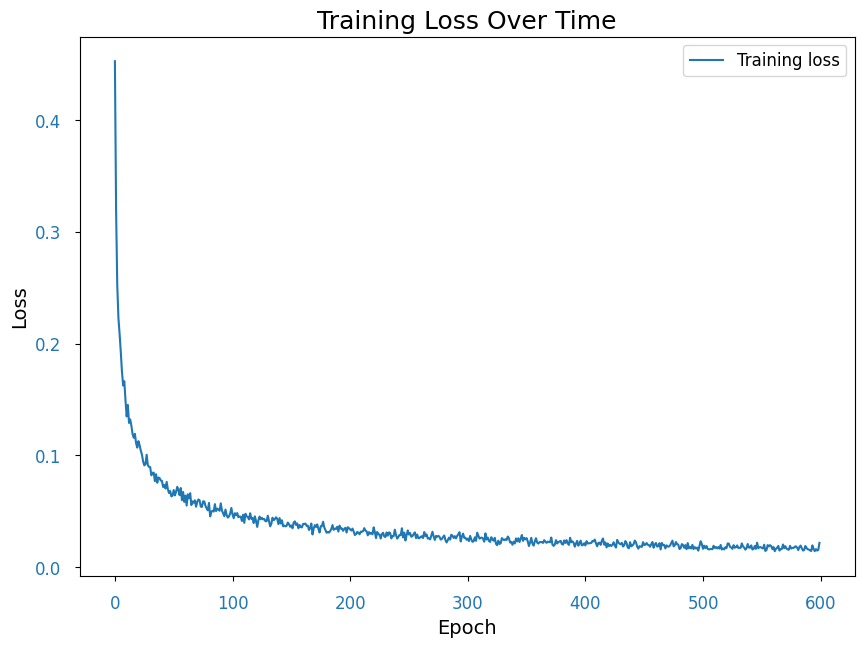

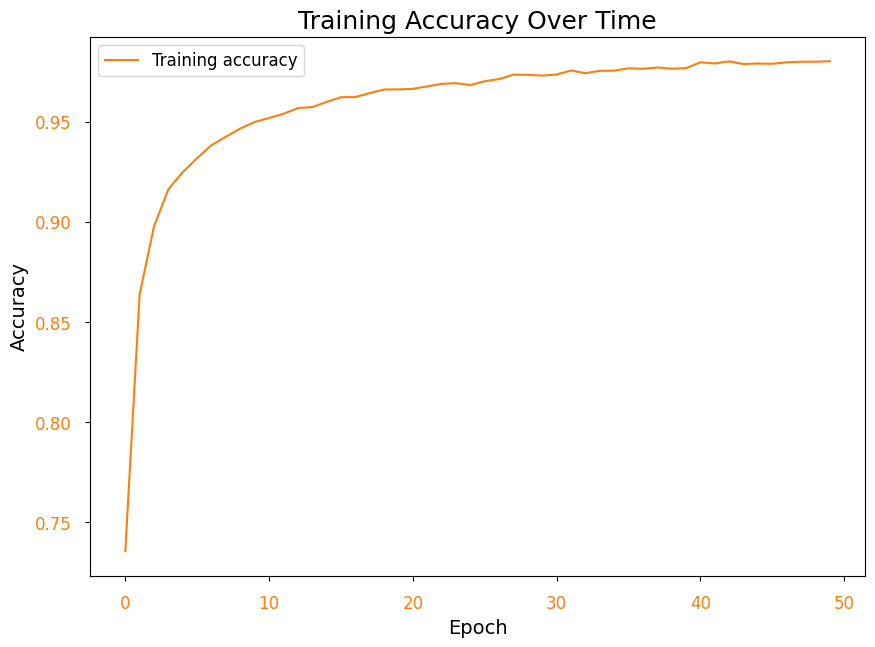

In [9]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Set the colors for the lines and markers
train_color = 'tab:blue'
test_color = 'tab:orange'
lr_color = 'tab:green'

# Plot the training loss
plt.plot(train_losses, color=train_color, label='Training loss')

# Add a title and axis labels
plt.title('Training Loss Over Time', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Set the font size and style of the tick labels
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor=train_color, pad=10)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()

# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the training accuracy
plt.plot(mean_accuracies, color=test_color, label='Training accuracy')

# Add a title and axis labels
plt.title('Training Accuracy Over Time', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Set the font size and style of the tick labels
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor=test_color, pad=10)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()